## Titanic: Machine Learning from Disaster - ML 프로젝트 보고서 코드
### 의용생체공학과 201738413 김지연
보고서는 워드로 작성하여 제출하였습니다.

## 1. 데이터 분석

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
data = pd.read_csv('data/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
# 학습 데이터에서 결측값 확인
data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### 전체 생존율 확인

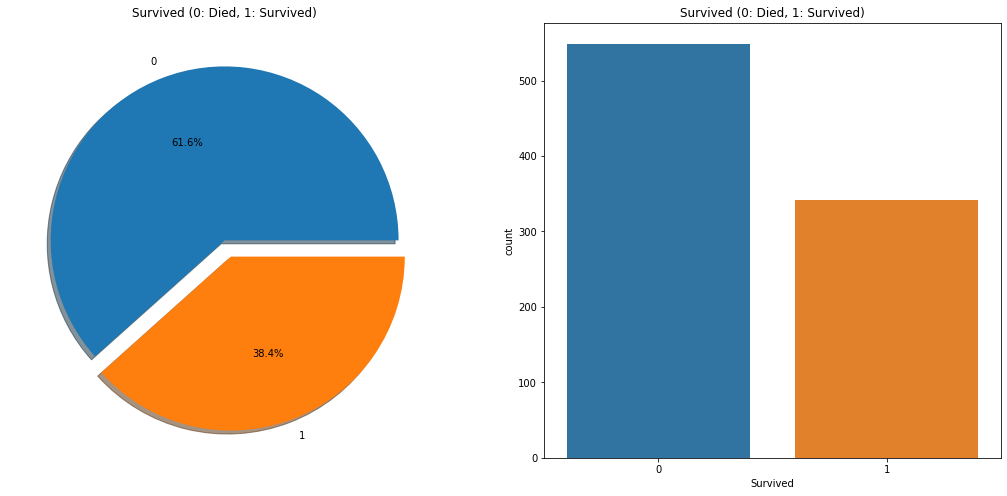

In [109]:
# 전체 생존율 확인
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived (0: Died, 1: Survived)')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived (0: Died, 1: Survived)')
plt.show()

### 성별에 따른 생존율 확인

In [110]:
# 성별에 따른 생존율 확인
pd.crosstab([data['Survived']],data['Sex'],margins=True).style.background_gradient(cmap='summer_r')

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


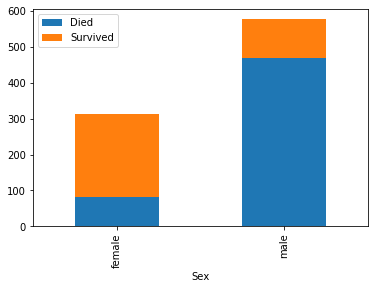

In [111]:
data['Died'] = 1 - data['Survived'] # 이거 Died 속성 쓰고 제거해야함
data.groupby('Sex').agg('sum')[['Died','Survived']].plot(kind='bar',stacked=True)
plt.show()

### 객실 등급에 따른 생존율 확인

In [112]:
# 객실 등급에 따른 생존율 확인
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

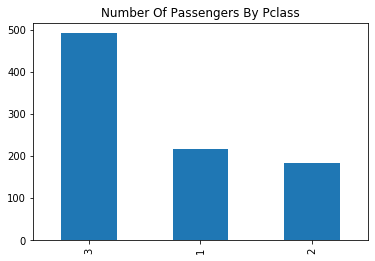

In [113]:
plt.plot(figsize=(18,8))

data['Pclass'].value_counts().plot.bar()
plt.title('Number Of Passengers By Pclass')
plt.show()

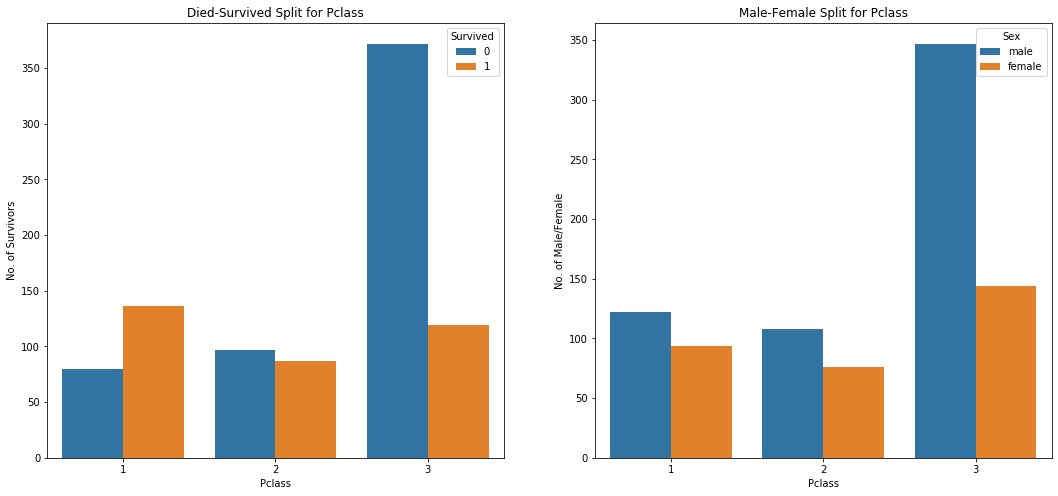

In [114]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Died-Survived Split for Pclass')
ax[0].set_ylabel('No. of Survivors')

sns.countplot('Pclass',hue='Sex',data=data,ax=ax[1])
ax[1].set_title('Male-Female Split for Pclass')
ax[1].set_ylabel('No. of Male/Female')

plt.show()
plt.show()

### 나이에 따른 생존율 확인-1 (결측값 처리 전)

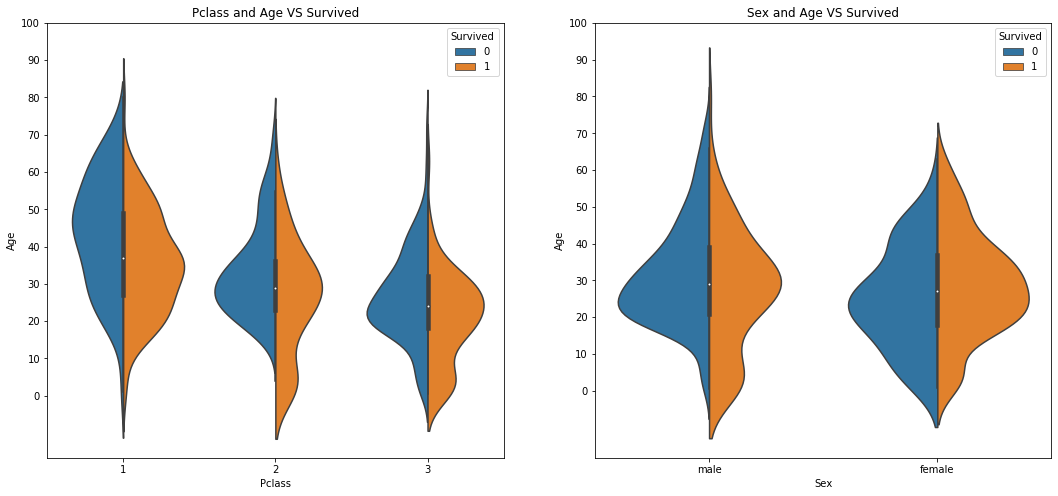

In [115]:
# 나이에 따른 생존율 확인-1 (결측값 처리 전)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [116]:
data['Age'].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


### Age 특성 결측값 처리

In [117]:
# Age 특성 결측값 처리
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

print(data['Initial'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [118]:
data['Initial'].to_frame()

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [119]:
data['Name'].to_frame()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [120]:
pd.crosstab(data.Initial,data.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [121]:
# 기존 17개의 호칭을 4개의 호칭으로 나이에 따라 정리함
data['Initial'].replace(['Sir', 'Dr', 'Don', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Major', 'Mme', 'Countess', 'Lady', 'Mlle', 'Ms'],['Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Miss'],inplace=True)
pd.crosstab(data.Initial,data.Sex)

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,537
Mrs,127,0


In [122]:
data.groupby('Initial')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Initial,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,150.0,22.020000,13.003824,0.75,14.625,21.5,30.0,63.0
Mr,418.0,33.022727,12.996267,11.00,23.000,30.0,40.0,80.0
Mrs,110.0,35.763636,11.388009,14.00,27.250,35.0,44.0,63.0


In [123]:
# Age 특성이 null값인 샘플에 대해 호칭에 따라 나이를 새로 넣어줌
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22

In [124]:
# 전처리 후 결측값 있는지 확인
data.Age.isnull().any()
data.Age.isnull().sum()

0

In [125]:
data['Age'].max()

80.0

### 나이에 따른 생존율 확인-2 (결측값 처리 후)

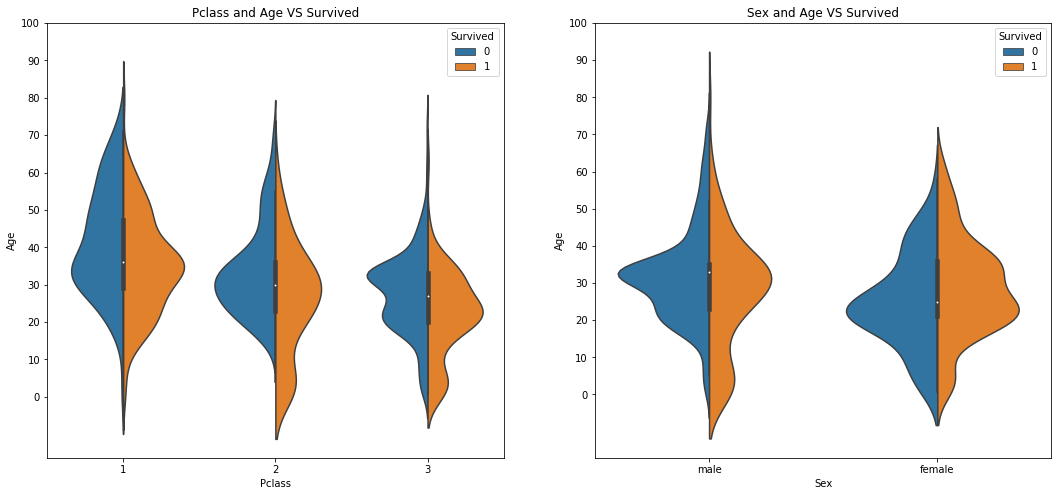

In [126]:
# 나이에 따른 생존율 확인-2 (결측값 처리 후)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [127]:
data['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [128]:
# Embarked 특성 결측값 처리
data['Embarked'].fillna('S',inplace=True)

In [129]:
# 전처리 후 결측값 있는지 확인
data.Embarked.isnull().any()
data.Embarked.isnull().sum()

0

### 탑승 항구에 따른 생존율 확인

In [130]:
# 탑승 항구에 따른 생존율 확인
pd.crosstab([data['Pclass'],data['Sex'],data['Survived']],data['Embarked'],margins=True)

Embarked                  C   Q    S  All
Pclass Sex    Survived                   
1      female 0           1   0    2    3
              1          42   1   48   91
       male   0          25   1   51   77
              1          17   0   28   45
2      female 0           0   0    6    6
              1           7   2   61   70
       male   0           8   1   82   91
              1           2   0   15   17
3      female 0           8   9   55   72
              1          15  24   33   72
       male   0          33  36  231  300
              1          10   3   34   47
All                     168  77  646  891

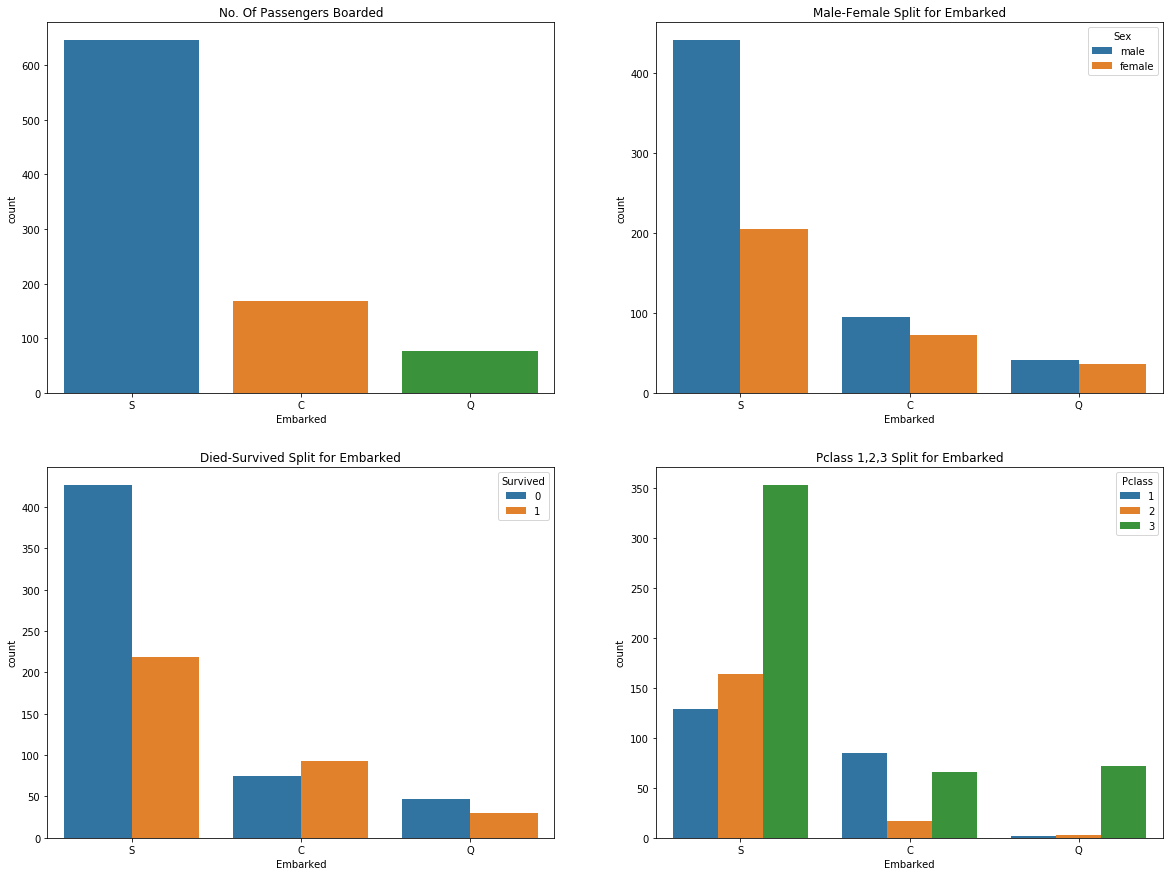

In [131]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Died-Survived Split for Embarked')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Pclass 1,2,3 Split for Embarked')
plt.show()

### 연속형 데이터 범주형으로 변환-1

In [132]:
# 연속형 데이터 Age를 5 구간의 범주형 데이터로 바꿔준다
data['Age_band']=0

data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,2


In [133]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


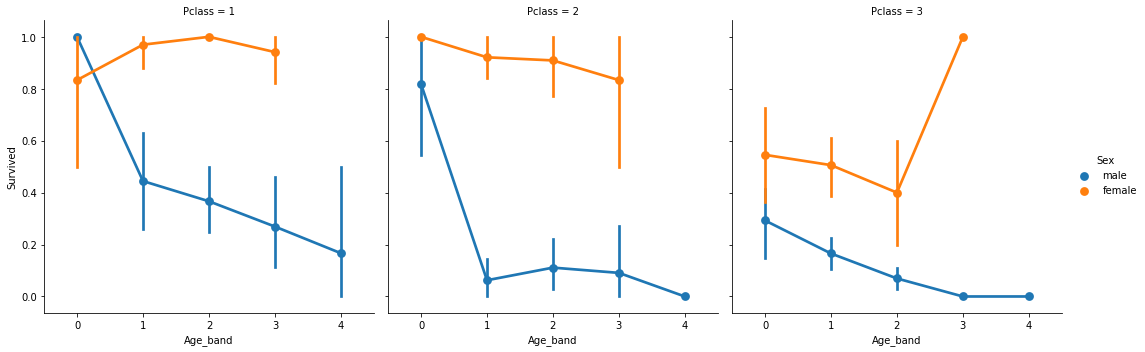

In [134]:
sns.factorplot('Age_band','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### 연속형 데이터 범주형으로 변환-2

In [135]:
# 연속형 데이터 Fare의 4구간 기준을 찾기 위해 Fare_Range라는 속성을 만든다
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [136]:
# 연속형 데이터 Fare를 4 구간의 범주형 데이터로 바꿔준다
data['Fare_new']=0

data.loc[data['Fare']<=7.91,'Fare_new']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_new']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_new']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_new']=3

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Initial,Age_band,Fare_Range,Fare_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,2,"(7.91, 14.454]",1


In [137]:
data['Fare_new'].value_counts().to_frame()

,Fare_new
2,229
0,223
3,222
1,217


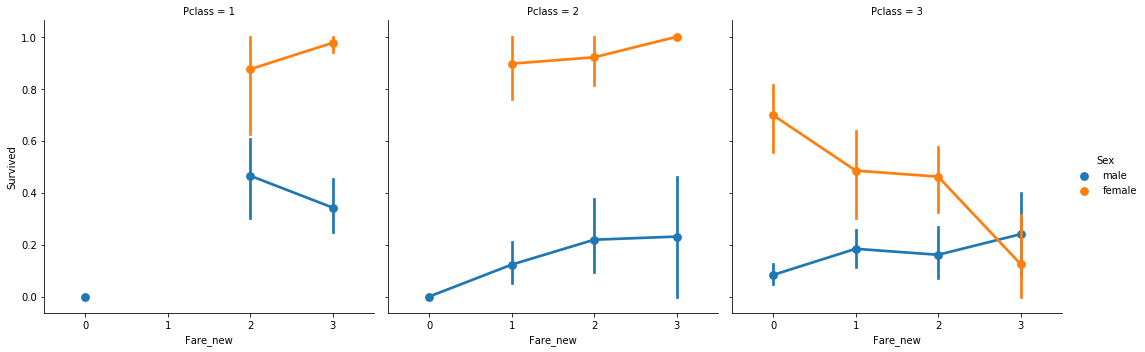

In [138]:
sns.factorplot('Fare_new','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### 새로운 특성 생성

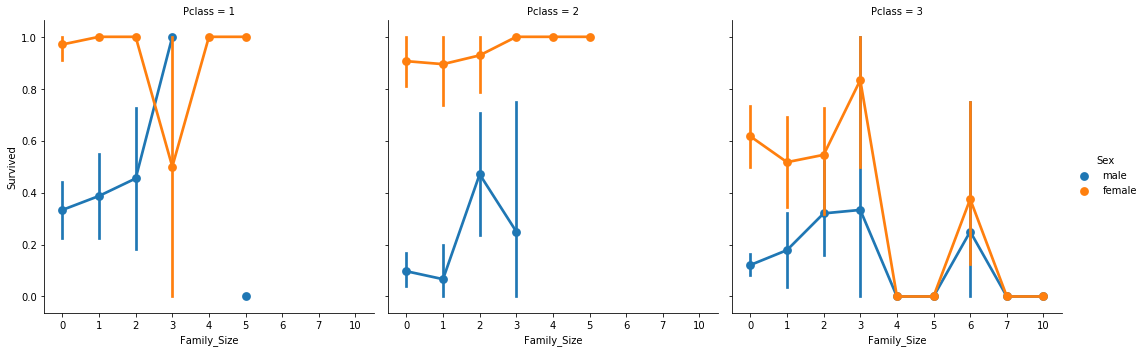

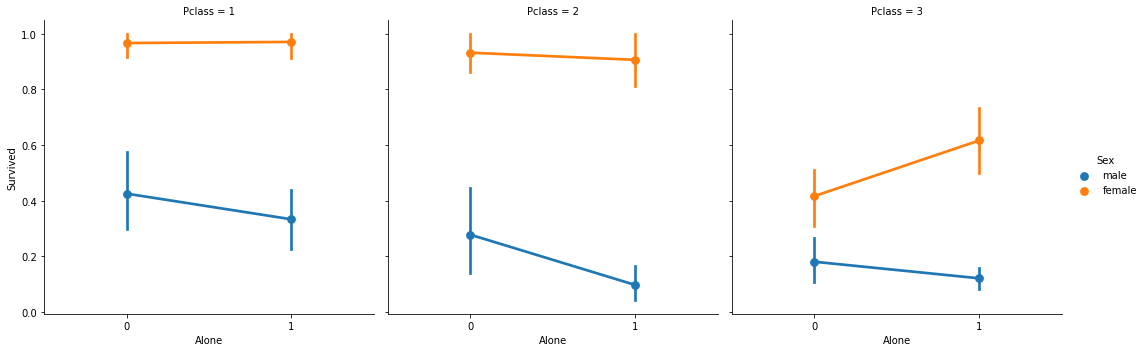

In [139]:
# 두 개의 상호 연관성이 있는 특성들을 합쳐서 하나의 특성으로 만든다
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
sns.factorplot('Family_Size','Survived',data=data, hue='Sex', col='Pclass')

data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone']=1
sns.factorplot('Alone','Survived',data=data, hue='Sex', col='Pclass')

plt.show()

In [140]:
data['Family_Size'].value_counts().to_frame()

,Family_Size
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [141]:
data['Family_Size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

### 기존의 특성 삭제

In [142]:
data.drop(['Cabin','PassengerId','Name','Ticket','Age','Fare','Fare_Range', 'Died'], axis=1,inplace=True)

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_new,Family_Size,Alone
0,0,3,male,1,0,S,Mr,1,0,1,0
1,1,1,female,1,0,C,Mrs,2,3,1,0
2,1,3,female,0,0,S,Miss,1,1,0,1
3,1,1,female,1,0,S,Mrs,2,3,1,0
4,0,3,male,0,0,S,Mr,2,1,0,1


### 문자열 데이터 변환

In [143]:
# 문자열 데이터를 가진 특성들을 수로 변환한다
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master'],[0,1,2,3],inplace=True)

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_new,Family_Size,Alone
0,0,3,0,1,0,0,0,1,0,1,0
1,1,1,1,1,0,1,1,2,3,1,0
2,1,3,1,0,0,0,2,1,1,0,1
3,1,1,1,1,0,0,1,2,3,1,0
4,0,3,0,0,0,0,0,2,1,0,1


## 2. 모델 형성

In [144]:
# 모델 형성에 필요한 머신러닝 패키지 import
from numpy import nan
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # logistic regression - 챕터 4
from sklearn import svm # Support Vector Machine (SVM) - 챕터 5
from sklearn.tree import DecisionTreeClassifier # Decision Tree - 챕터 6
from sklearn.ensemble import RandomForestClassifier # Random Forest - 챕터 7

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [145]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

#  Train set, Test set
train_X = train[train.columns[1:]]
test_X = test[test.columns[1:]]

# Train label, Test label
train_Y = train[train.columns[:1]]
test_Y = test[test.columns[:1]]

# Metrics 용
X = data[data.columns[1:]]
Y = data['Survived']

In [146]:
model = LogisticRegression()
model.fit(train_X,train_Y)
pred_LogReg=model.predict(test_X)
print('LogisticRegression 정확도 :',metrics.accuracy_score(pred_LogReg, test_Y))

LogisticRegression 정확도 : 0.8171641791044776


In [147]:
model = svm.SVC(kernel='linear', C=0.01, gamma=0.1)
model.fit(train_X,train_Y)
pred_linSVM = model.predict(test_X)
print('SVC(Linear SVM) 정확도 :', metrics.accuracy_score(pred_linSVM, test_Y))

SVC(Linear SVM) 정확도 : 0.8246268656716418


In [48]:
# 하이퍼파라미터 튜닝
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['linear', 'rbf']

hyper={'kernel':kernel,
       'C':C,
       'gamma':gamma}

Grid = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
Grid.fit(X,Y)

print(Grid.best_score_)
print(Grid.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293829640323898
SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   12.8s finished


In [148]:
model = svm.SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)
model.fit(train_X,train_Y)
pred_rbf = model.predict(test_X)
print('SVC(non-linear SVM, RBF) 정확도 :', metrics.accuracy_score(pred_rbf, test_Y))

SVC(non-linear SVM, RBF) 정확도 : 0.835820895522388


In [149]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)
pred_BaggedDT = model.predict(test_X)
print('BaggedDT 정확도 :', metrics.accuracy_score(pred_BaggedDT,test_Y))

BaggedDT 정확도 : 0.8283582089552238


In [51]:
# 하이퍼파라미터 튜닝
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}

Grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
Grid.fit(X,Y)

print(Grid.best_score_)
print(Grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   20.6s finished


0.8215805661917017
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [150]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None, max_features='auto',
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=400,
                               n_jobs=None, oob_score=False, random_state=0, verbose=0,
                               warm_start=False)
model.fit(train_X,train_Y)
pred_RndFrst = model.predict(test_X)
print('RandomForestClassifier 정확도 :', metrics.accuracy_score(pred_RndFrst, test_Y))

RandomForestClassifier 정확도 : 0.8171641791044776


In [151]:
ensemble_model = VotingClassifier(estimators=[
                                            ('LR',LogisticRegression(C=0.05)),
                                            ('Lin-SVM', svm.SVC(kernel='linear',probability=True)),  
                                            ('RBF-SVM', svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                            ('BaggedDT', DecisionTreeClassifier(random_state=0)),    
                                            ('RandomForest', RandomForestClassifier(n_estimators=500,random_state=0))
                                            ], voting='soft').fit(train_X,train_Y)
print('앙상블 모델 정확도 :', ensemble_model.score(test_X,test_Y))

앙상블 모델 정확도 : 0.8246268656716418


In [54]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}

Grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
Grid.fit(X,Y)

print(Grid.best_score_)
print(Grid.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316238779737619
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.4min finished


In [152]:
ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05, 
                         n_estimators=100, random_state=None)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8316479400749064


In [56]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}

Grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyper, verbose=True)
Grid.fit(X,Y)

print(Grid.best_score_)
print(Grid.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.6min finished


0.819327098110602
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [153]:
grad = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8070536828963796


In [58]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}

Grid = GridSearchCV(estimator=xg.XGBClassifier(), param_grid=hyper, verbose=True)
Grid.fit(X,Y)

print(Grid.best_score_)
print(Grid.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8226790534178647
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  4.7min finished


In [154]:
xgboost = xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8171161048689137


### Cross-Validation

In [155]:
kfold = KFold(n_splits=10, random_state=0)
mean=[]
accuracy=[]
std=[]

classifiers = ['Logistic Regression', 'Linear SVM', 'RBF SVM', 'Bagged Decision Tree',
               'Random Forest', 'Ensemble', 'Adaboost', 'GradientBoost', 'XGBoost']
models = [LogisticRegression(), svm.SVC(kernel='linear'), 
          svm.SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                max_iter=-1, probability=True, random_state=None, shrinking=True,
                tol=0.001, verbose=False), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                            random_state=0, n_estimators=100), 
          RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False),
          VotingClassifier(estimators=[
                            ('LR',LogisticRegression(C=0.05)),
                            ('Lin-SVM', svm.SVC(kernel='linear',probability=True)),  
                            ('RBF-SVM', svm.SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=True, random_state=None, shrinking=True,
                                            tol=0.001, verbose=False)),
                            ('BaggedDT', BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                                            random_state=0, n_estimators=100)),
                            ('RandomForest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                           criterion='gini', max_depth=None, max_features='auto',
                                           max_leaf_nodes=None, max_samples=None,
                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, n_estimators=400,
                                           n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                           warm_start=False)),
                            ], voting='soft').fit(train_X,train_Y),
            AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                       n_estimators=100, random_state=None),
            GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False),
            xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                          importance_type='gain', interaction_constraints='',
                          learning_rate=0.05, max_delta_step=0, max_depth=6,
                          min_child_weight=1, missing=nan, monotone_constraints='()',
                          n_estimators=100, n_jobs=0, num_parallel_tree=1,
                          objective='binary:logistic', random_state=0, reg_alpha=0,
                          reg_lambda=1, scale_pos_weight=1, subsample=1,
                          tree_method='exact', validate_parameters=1, verbosity=None)
            ]

for i in models:
    model = i
    acc = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    mean.append(acc.mean())
    std.append(acc.std())
    accuracy.append(acc)
    
cv_models_df = pd.DataFrame({'CV Mean':mean,'Std':std}, index=classifiers)       
cv_models_df

,CV Mean,Std
Logistic Regression,0.818202,0.023813
Linear SVM,0.818190,0.042538
RBF SVM,0.829413,0.034694
Bagged Decision Tree,0.815993,0.033388
Random Forest,0.817116,0.034441
Ensemble,0.829413,0.036120
Adaboost,0.831648,0.035179
GradientBoost,0.814844,0.038183
XGBoost,0.821598,0.039426


### Confusion Matrix

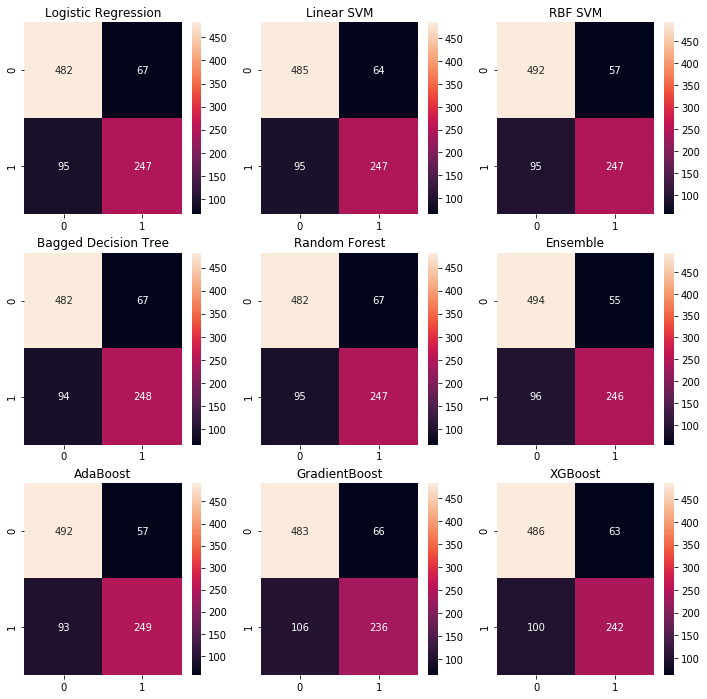

In [89]:
f,ax = plt.subplots(3, 3, figsize=(12,12))

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Logistic Regression')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Linear SVM')

y_pred = cross_val_predict(svm.SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                            max_iter=-1, probability=False, random_state=None, shrinking=True,
                            tol=0.001, verbose=False)
                           ,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('RBF SVM')

y_pred = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                            random_state=0, n_estimators=100)
                           ,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Bagged Decision Tree')

y_pred = cross_val_predict(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=None, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_jobs=None, oob_score=False, random_state=0, verbose=0,
                           warm_start=False)
                           ,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Random Forest')

y_pred = cross_val_predict(VotingClassifier(estimators=[
                            ('LR',LogisticRegression(C=0.05)),
                            ('Lin-SVM', svm.SVC(kernel='linear',probability=True)),  
                            ('RBF-SVM', svm.SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=True, random_state=None, shrinking=True,
                                            tol=0.001, verbose=False)),
                            ('BaggedDT', BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                                            random_state=0, n_estimators=100)),
                            ('RandomForest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                           criterion='gini', max_depth=None, max_features='auto',
                                           max_leaf_nodes=None, max_samples=None,
                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, n_estimators=400,
                                           n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                           warm_start=False))
                            ], voting='soft').fit(train_X,train_Y), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Ensemble')

y_pred = cross_val_predict(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                           n_estimators=100, random_state=None)
                           ,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('AdaBoost')

y_pred = cross_val_predict(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
                           ,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('GradientBoost')

y_pred = cross_val_predict(xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                          importance_type='gain', interaction_constraints='',
                          learning_rate=0.05, max_delta_step=0, max_depth=6,
                          min_child_weight=1, missing=nan, monotone_constraints='()',
                          n_estimators=100, n_jobs=0, num_parallel_tree=1,
                          objective='binary:logistic', random_state=0, reg_alpha=0,
                          reg_lambda=1, scale_pos_weight=1, subsample=1,
                          tree_method='exact', validate_parameters=1, verbosity=None)
                           ,X,Y,cv=10)

sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('XGBoost')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Feature Importance

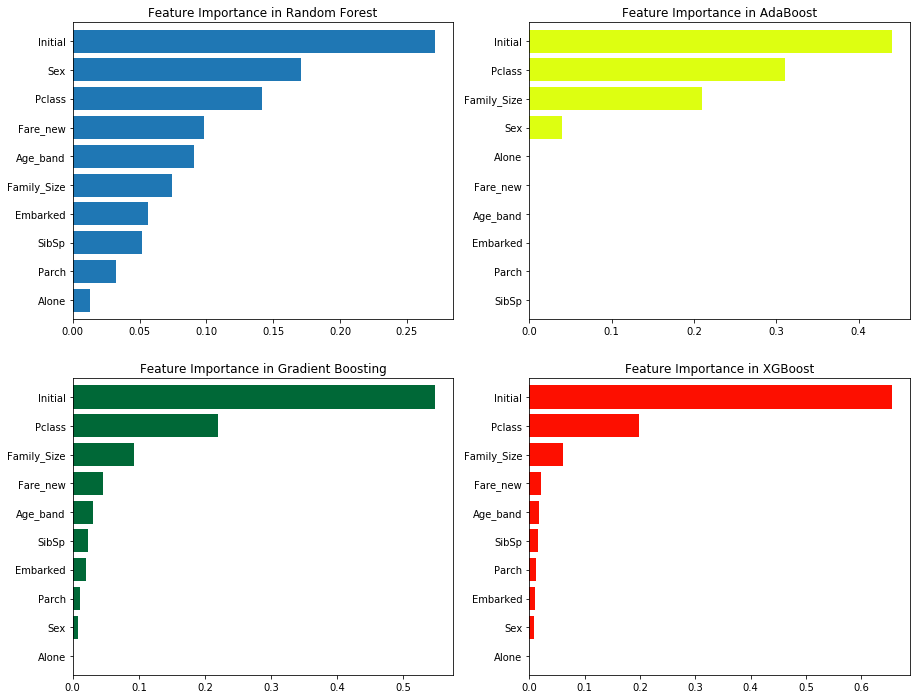

In [95]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=None, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_jobs=None, oob_score=False, random_state=0, verbose=0,
                           warm_start=False)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                       n_estimators=100, random_state=None)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                          importance_type='gain', interaction_constraints='',
                          learning_rate=0.05, max_delta_step=0, max_depth=6,
                          min_child_weight=1, missing=nan, monotone_constraints='()',
                          n_estimators=100, n_jobs=0, num_parallel_tree=1,
                          objective='binary:logistic', random_state=0, reg_alpha=0,
                          reg_lambda=1, scale_pos_weight=1, subsample=1,
                          tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XGBoost')

plt.show()

## 4. Kaggle Submission

In [189]:
test_csv = pd.read_csv('data/test.csv',low_memory=False)

test_csv['Initial']=0
for i in test_csv:
    test_csv['Initial']=test_csv.Name.str.extract('([A-Za-z]+)\.')

test_csv['Initial'].replace(['Sir', 'Dr', 'Don', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Major', 'Mme', 'Countess', 'Lady', 'Mlle', 'Ms', 'Dona'],['Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Miss','Miss'],inplace=True)
 
test_csv['Age_band']=0
test_csv.loc[test_csv['Age']<=16,'Age_band']=0
test_csv.loc[(test_csv['Age']>16)&(test_csv['Age']<=32),'Age_band']=1
test_csv.loc[(test_csv['Age']>32)&(test_csv['Age']<=48),'Age_band']=2
test_csv.loc[(test_csv['Age']>48)&(test_csv['Age']<=64),'Age_band']=3
test_csv.loc[test_csv['Age']>64,'Age_band']=4

test_csv['Fare_new']=0
test_csv.loc[test_csv['Fare']<=7.91,'Fare_new']=0
test_csv.loc[(test_csv['Fare']>7.91)&(test_csv['Fare']<=14.454),'Fare_new']=1
test_csv.loc[(test_csv['Fare']>14.454)&(test_csv['Fare']<=31),'Fare_new']=2
test_csv.loc[(test_csv['Fare']>31)&(test_csv['Fare']<=513),'Fare_new']=3

test_csv['Family_Size'] = 0
test_csv['Family_Size'] = test_csv['Parch'] + test_csv['SibSp']

test_csv['Alone'] = 0
test_csv.loc[test_csv.Family_Size==0,'Alone']=1

test_csv.drop(['Cabin','PassengerId','Name','Ticket','Age','Fare'], axis=1,inplace=True)
test_csv['Sex'].replace(['male','female'],[0,1],inplace=True)
test_csv['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_csv['Initial'].replace(['Mr','Mrs','Miss','Master'],[0,1,2,3],inplace=True)

test_csv.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Fare_new,Family_Size,Alone
0,3,0,0,0,2,0,2,0,0,1
1,3,1,1,0,0,1,2,0,1,0
2,2,0,0,0,2,0,3,1,0,1
3,3,0,0,0,0,0,1,1,0,1
4,3,1,1,1,0,1,1,1,2,0


In [190]:
m = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                       n_estimators=100, random_state=None)
m.fit(train_X,train_Y)
m.score(train_X,train_Y)

0.8314606741573034

In [191]:
output = m.predict(test_csv).astype(int)

test_csv_df = pd.read_csv('data/test.csv',low_memory=False)
df_output = pd.DataFrame()
df_output['PassengerId'] = test_csv_df['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission.csv', index=False)

In [194]:
output.shape

(418,)